## UN Data Exploration

This is my first comment on this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For later # pd.read_csv("../data/continents.csv")

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


remove the Value footnotes column and rename the other columns to "Country", "Year", and "GDP_Per_capita"

In [5]:
gdp_df = (
    gdp_df
    .rename(columns={"Country or Area" : "Country", "Value" : "GDP_Per_Capita"})
    .drop('Value Footnotes', axis=1)
)

How many rows and columns does gdp_df have? What are the data types of its columns? There are 7,662 rows, and 3 columns (once value footnotes is removed). Country is nominal categorical, Year is ordinal categorical, and value is continuous numerical.

In [6]:
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format = '%Y', errors='coerce').dt.to_period('Y')

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   Country         7662 non-null   object       
 1   Year            7662 non-null   period[Y-DEC]
 2   GDP_Per_Capita  7662 non-null   float64      
dtypes: float64(1), object(1), period[Y-DEC](1)
memory usage: 179.7+ KB


Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice? The years are 1990 to 2022. The number of observations is the lowest in 1990 and goes up into the 2000s and 2010s capping at 2013 before going back down a little in 2021.

In [8]:
gdp_df["Year"].min()

Period('1990', 'Y-DEC')

In [9]:
gdp_df["Year"].max()

Period('2022', 'Y-DEC')

In [10]:
gdp_df["Year"].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Freq: Y-DEC, Name: count, dtype: int64

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations? There are 242 countries. The least represented are the Middle Eastern and African countries. I think this would be due to these countries being less developed, nd thus having less data collection organizations.

In [11]:
gdp_df['Country'].nunique()

242

In [12]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [13]:
gdp_2021 = gdp_df.loc[gdp_df["Year"] == '2021']

In [14]:
gdp_2021.describe()

,GDP_Per_Capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution? It is unimodal with a heavy right skew. 

Text(0.5, 1.0, 'GDP Per Capita of 242 Countries 2021')

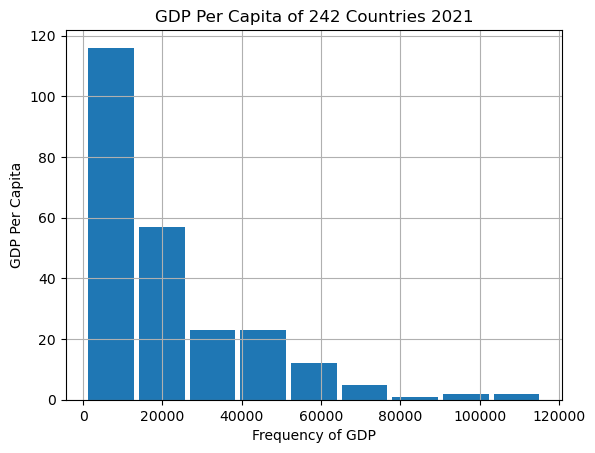

In [15]:
gdp_2021.hist(bins=9, rwidth=0.9)
plt.xlabel('Frequency of GDP')                            
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita of 242 Countries 2021')

Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [16]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False).head(5)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [17]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False).tail(5)

,Country,Year,GDP_Per_Capita
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686
972,Burundi,2021,714.066712


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted

In [18]:
gdp_pivoted = gdp_df.pivot_table('GDP_Per_Capita', index = 'Country', columns = 'Year').dropna(axis='rows', subset=['1990', '2021'])

Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [19]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted['2021'] - gdp_pivoted['1990']) / gdp_pivoted['1990']

In [20]:
gdp_pivoted['Percent_Change'].sort_values(ascending = False).tail(20)

Country
Vanuatu                                      0.950043
The Gambia                                  -0.172662
Kiribati                                    -1.822996
Tajikistan                                  -2.014757
Barbados                                    -2.430187
Kyrgyz Republic                             -4.352813
Guinea-Bissau                               -8.347123
Fragile and conflict affected situations   -10.913738
Brunei                                     -14.542192
The Bahamas                                -15.757559
Madagascar                                 -18.043873
Haiti                                      -20.251203
Ukraine                                    -21.177578
Gabon                                      -21.325301
Zimbabwe                                   -21.799100
Central African Republic                   -30.243599
United Arab Emirates                       -34.147317
Congo                                      -35.406695
Dem. Rep. Congo     

How many countries experienced a negative percent change in GDP per capita from 1990 to 2021? 19 Countries experienced a negative percent change.

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.
Guinea had the highest change in fluctuation. China, the second, is steadily on the rise and has recently passed Guinea (2020).

In [21]:
gdp_pivoted['Percent_Change'].sort_values(ascending = False).head(5)

Country
Equatorial Guinea                              1463.081870
China                                          1140.082904
East Asia & Pacific (excluding high income)     603.268440
East Asia & Pacific (IDA & IBRD)                602.726652
Myanmar                                         593.351678
Name: Percent_Change, dtype: float64

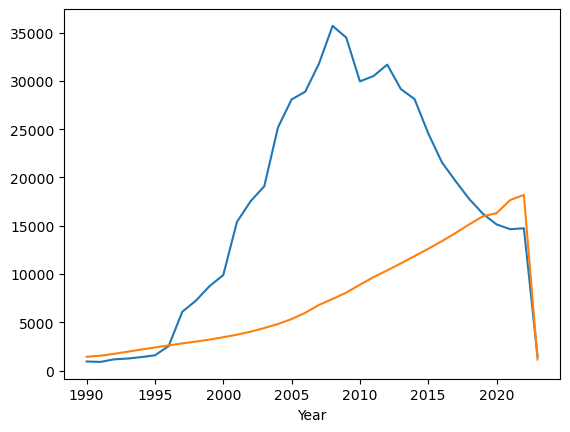

In [22]:
gdp_percent_change = (
    gdp_pivoted.loc['Equatorial Guinea'].plot.line(x = 'Year', y = 'Percent_Change'), 
    gdp_pivoted.loc['China'].plot.line(x = 'Year', y = 'Percent_Change')
)

In [23]:
continents = pd.read_csv("../data/continents.csv")

Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [25]:
gdp_df = pd.merge(gdp_df, continents, on='Country')

Determine the number of countries per continent. Create a bar chart showing this.

In [26]:
gdp_df_clean = gdp_df.drop_duplicates(subset='Country')
gdp_df_counts= gdp_df_clean['Continent'].value_counts()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

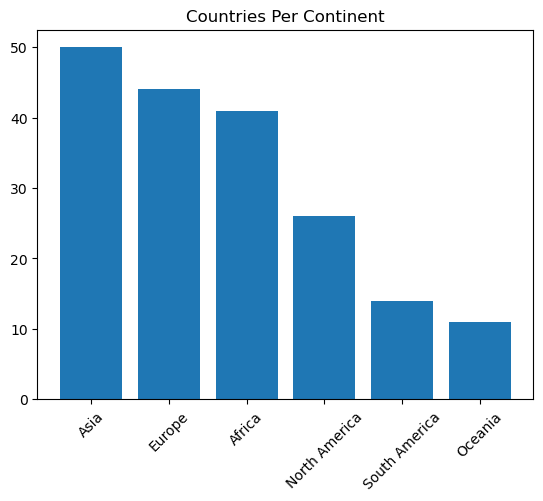

In [29]:
plt.bar(gdp_df_clean['Continent'].unique(), gdp_df_counts)
plt.title('Countries Per Continent')
plt.xticks(rotation=45)

Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [ ]:
sns.boxplot(